# 📞 Telco Customer Churn Prediction

## 1. Introduction

### 📌 Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Customer churn (müşteri kaybı), abonelik tabanlı şirketler için en kritik metriklerden biridir. Yeni müşteri kazanmanın maliyeti, mevcut müşteriyi elde tutmaktan çok daha yüksektir. Bu projede, bir telekomünikasyon şirketinin müşteri verilerini analiz ederek, hangi müşterilerin hizmeti terk etme (churn) riski taşıdığını tahmin etmeye çalışacağız.

### 🎯 Goal
Bu projenin temel amacı, müşterilerin demografik özellikleri, aldığı hizmetler ve hesap bilgilerini kullanarak **Churn** (Evet/Hayır) durumunu tahmin eden bir Makine Öğrenmesi modeli geliştirmektir. Bu bir **Binary Classification** (İkili Sınıflandırma) problemidir.

### 📂 Dataset Information
Veri seti 7043 satır (müşteri) ve 21 sütundan oluşmaktadır.
* **Churn:** Hedef değişken (Customers who left within the last month).
* **Services:** Müşterinin aldığı hizmetler (phone, internet, online security, etc.).
* **Account Info:** Sözleşme süresi, ödeme yöntemi, fatura tutarları.
* **Demographics:** Cinsiyet, yaş aralığı, partner durumu.

In [1]:
#kütüphaneleri import edelim. warningleri de kapatalım.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# dataseti yükleyelim
df = pd.read_csv("data/Telco-Customer-Churn.csv") #dosya yolunu kendi dosya yolunuza göre değiştirin
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Tip dönüşümlerini yapalım
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan).astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Eksik değerleri atalım
df = df.dropna()

In [8]:
#gereksiz sütunları atalım
df = df.drop(columns=['customerID'])

# EDA

In [9]:
# Sayısal sütunların istatistiksel özeti
print(df.describe().T)

                 count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80  


In [10]:
# Kategorik (Object) sütunların özeti
print(df.describe(include=['object']).T)

                 count unique               top  freq
gender            7032      2              Male  3549
Partner           7032      2                No  3639
Dependents        7032      2                No  4933
PhoneService      7032      2               Yes  6352
MultipleLines     7032      3                No  3385
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      3                No  3497
OnlineBackup      7032      3                No  3087
DeviceProtection  7032      3                No  3094
TechSupport       7032      3                No  3472
StreamingTV       7032      3                No  2809
StreamingMovies   7032      3                No  2781
Contract          7032      3    Month-to-month  3875
PaperlessBilling  7032      2               Yes  4168
PaymentMethod     7032      4  Electronic check  2365
Churn             7032      2                No  5163


Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


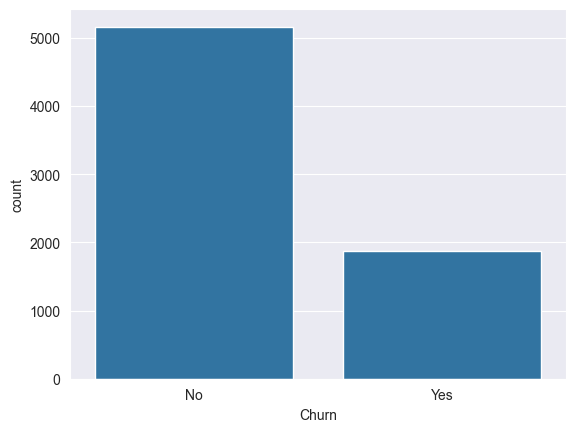

In [11]:
# Churn dağılımını yüzdesel gör
print(df["Churn"].value_counts(normalize=True))

sns.countplot(x="Churn", data=df)
plt.show()

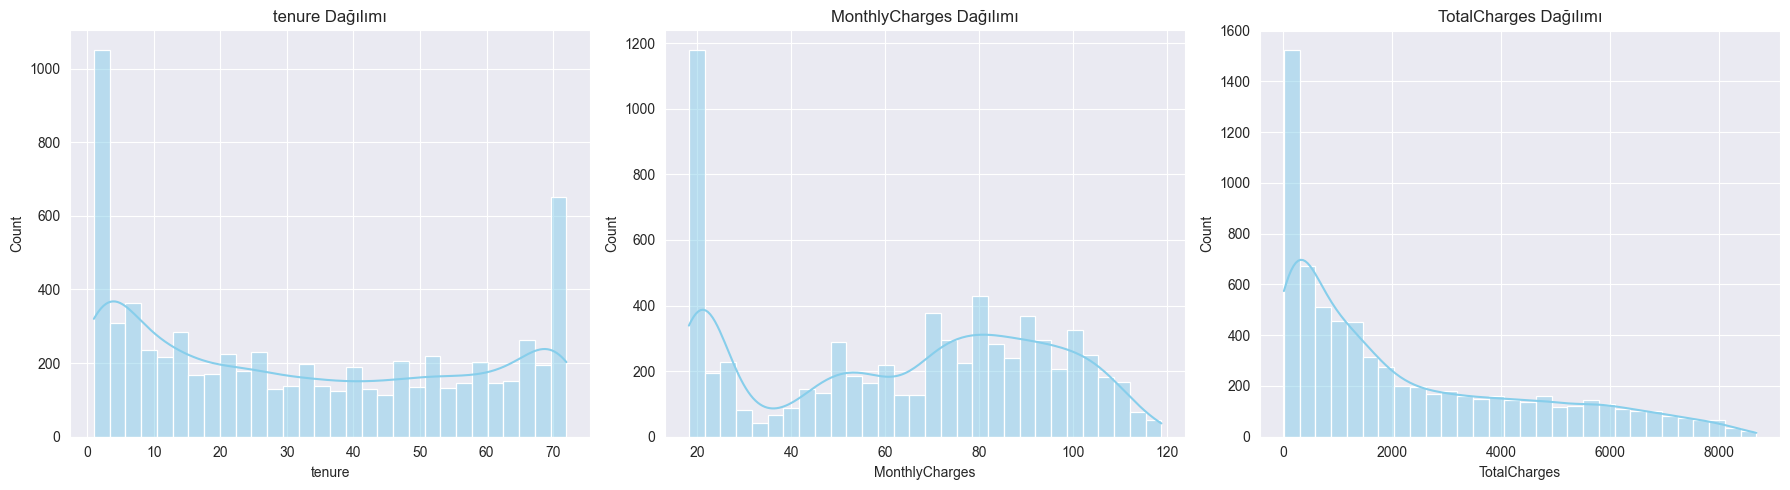

In [12]:
# Sayısal sütunları belirleyelim
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# 3'lü yan yana grafik çizelim
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col} Dağılımı')

plt.tight_layout()
plt.show()

In [13]:
# Churn sütunünü 0 ve 1 olarak kodlayalım
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [15]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

gender
Female    0.269595
Male      0.262046
Name: Churn, dtype: float64


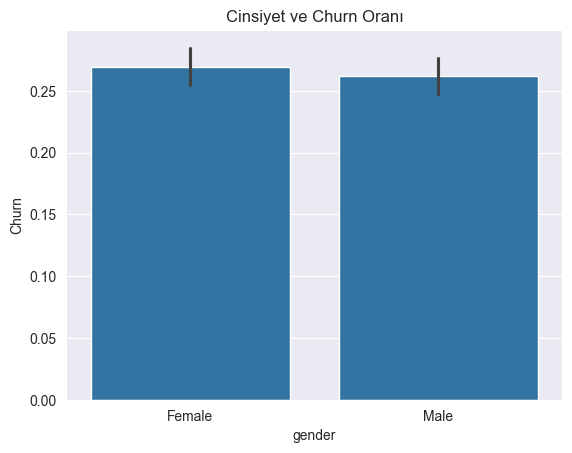

In [16]:
# gender etkiliyor mu bakalım
print(df.groupby('gender')['Churn'].mean())
sns.barplot(x='gender', y='Churn', data=df)
plt.title('Cinsiyet ve Churn Oranı')
plt.show()

In [17]:
#gender etkisi yok denecek kadar az görünüyor. bu yüzden drop edeceğiz.
df = df.drop(columns=['gender'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   object 
 2   Dependents        7032 non-null   object 
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  MonthlyCharges    7032 non-null   float64
 17  

Partner
No     0.329761
Yes    0.197171
Name: Churn, dtype: float64


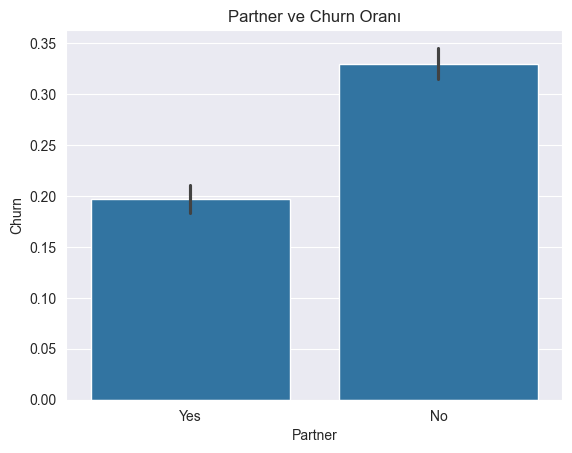

Dependents
No     0.312791
Yes    0.155312
Name: Churn, dtype: float64


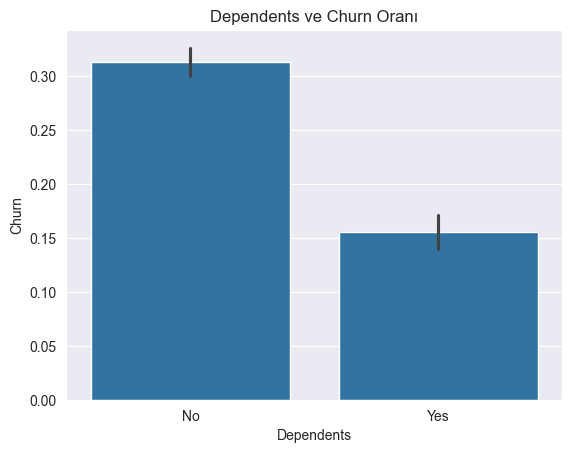

PhoneService
No     0.250000
Yes    0.267475
Name: Churn, dtype: float64


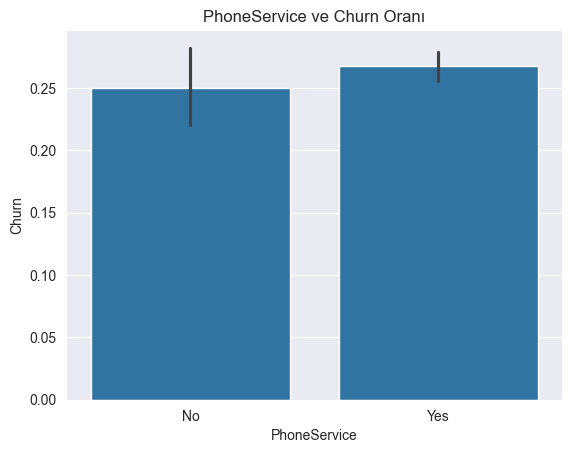

MultipleLines
No                  0.250812
No phone service    0.250000
Yes                 0.286485
Name: Churn, dtype: float64


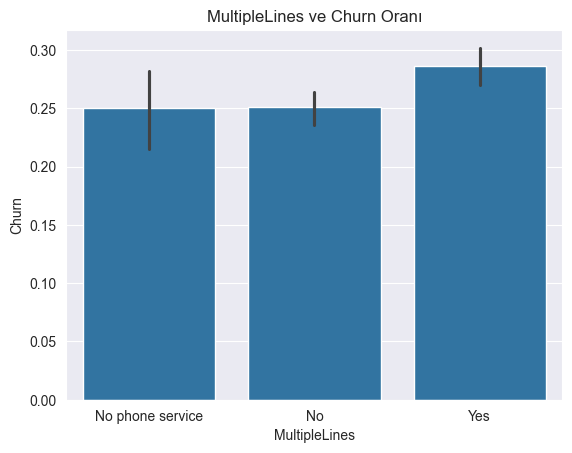

InternetService
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: Churn, dtype: float64


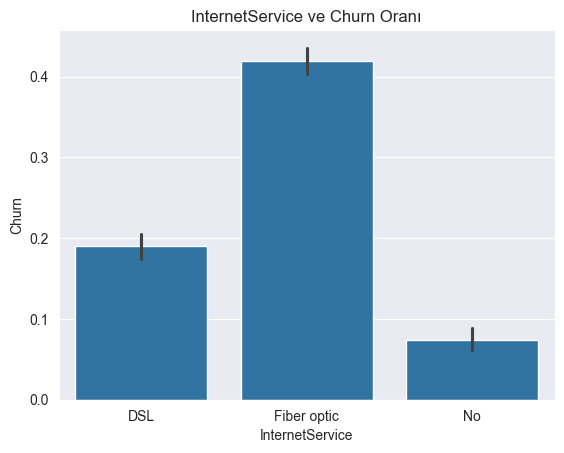

OnlineSecurity
No                     0.417787
No internet service    0.074342
Yes                    0.146402
Name: Churn, dtype: float64


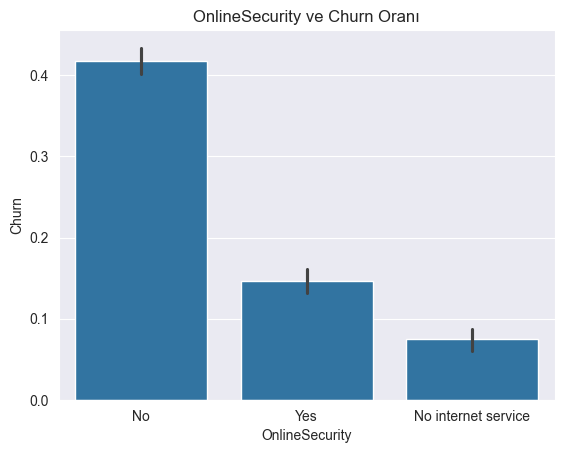

OnlineBackup
No                     0.399417
No internet service    0.074342
Yes                    0.215670
Name: Churn, dtype: float64


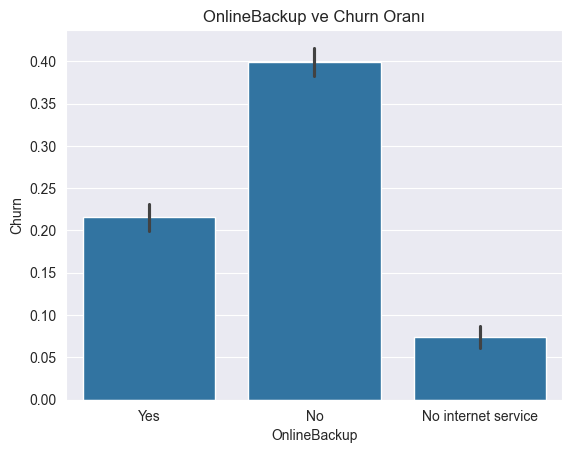

DeviceProtection
No                     0.391403
No internet service    0.074342
Yes                    0.225393
Name: Churn, dtype: float64


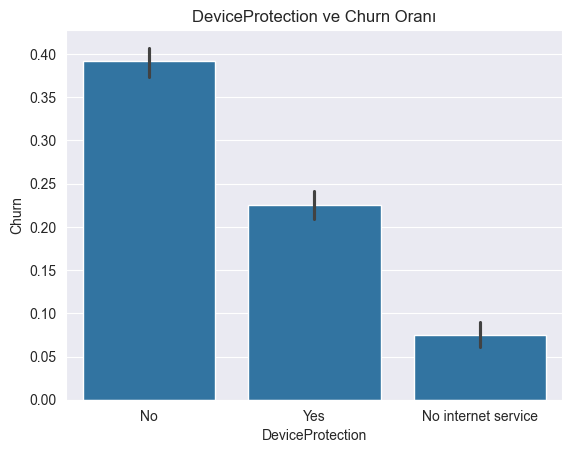

TechSupport
No                     0.416475
No internet service    0.074342
Yes                    0.151961
Name: Churn, dtype: float64


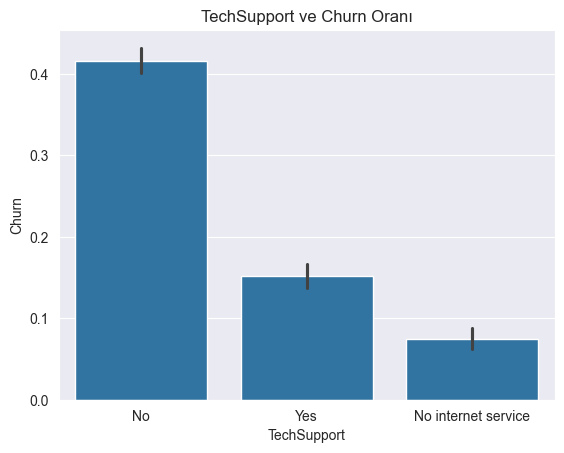

StreamingTV
No                     0.335351
No internet service    0.074342
Yes                    0.301147
Name: Churn, dtype: float64


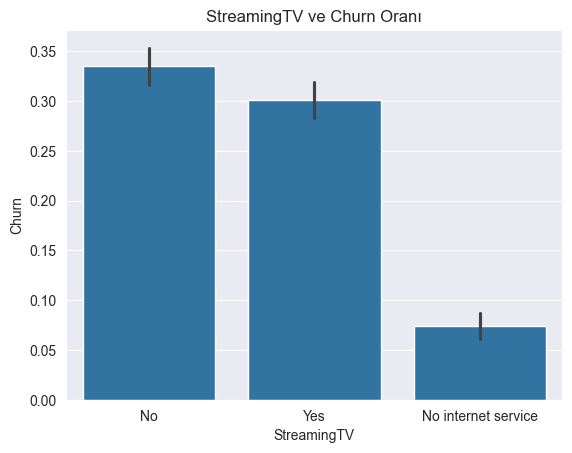

StreamingMovies
No                     0.337289
No internet service    0.074342
Yes                    0.299524
Name: Churn, dtype: float64


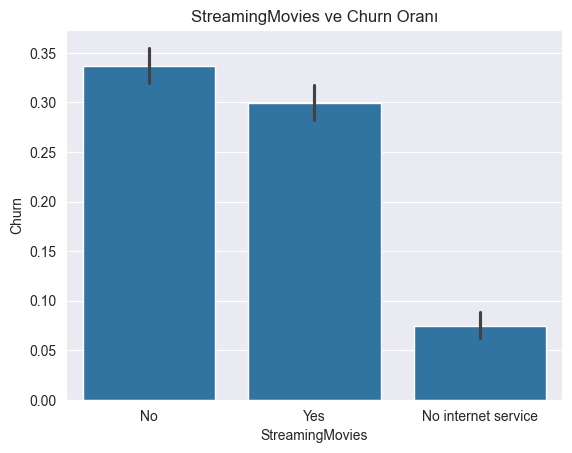

Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64


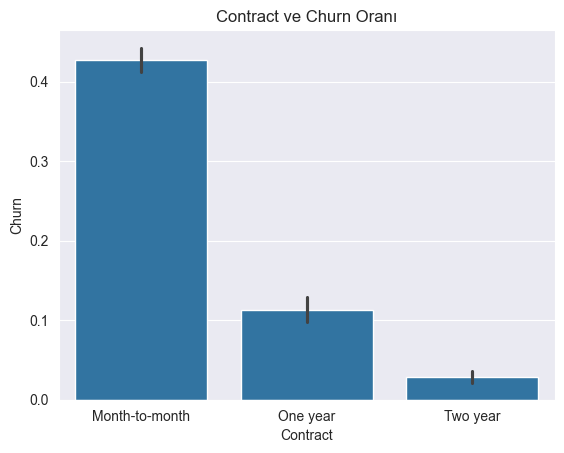

PaperlessBilling
No     0.163757
Yes    0.335893
Name: Churn, dtype: float64


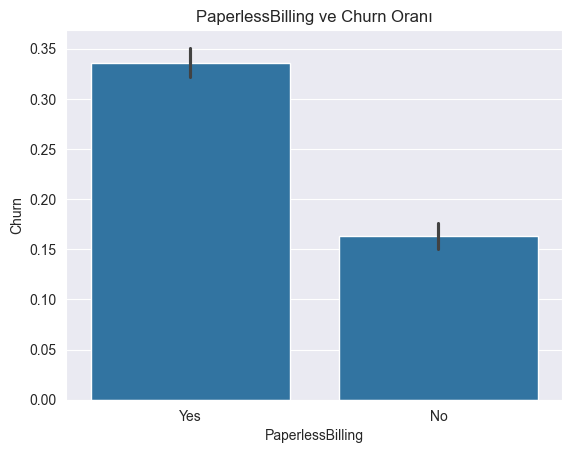

PaymentMethod
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
Electronic check             0.452854
Mailed check                 0.192020
Name: Churn, dtype: float64


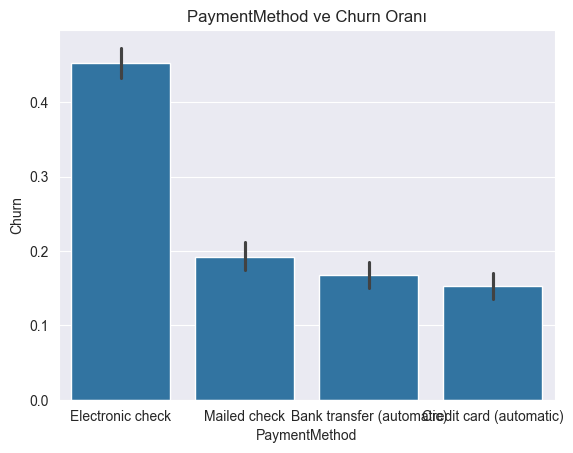

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
def etkisiz_sütunlar(data,columns):
    for col in columns:
        print(df.groupby(col)['Churn'].mean())
        sns.barplot(x= f'{col}', y='Churn', data=data)
        plt.title(f'{col} ve Churn Oranı')
        plt.show()
etkisiz_sütunlar(df,categorical_cols)

In [20]:
# İnceleme sonucunda 'PhoneService' i atacağız. ayrıca bazı sütunları birleştireceğiz.

df = df.drop(columns=['PhoneService'])
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service': 'No'})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': 'No'})
df['TechSupport'] = df['TechSupport'].replace({'No internet service': 'No'})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': 'No'})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': 'No'})

Partner
No     0.329761
Yes    0.197171
Name: Churn, dtype: float64


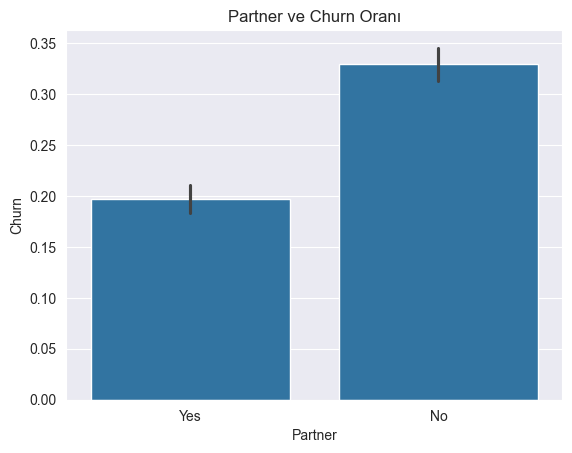

Dependents
No     0.312791
Yes    0.155312
Name: Churn, dtype: float64


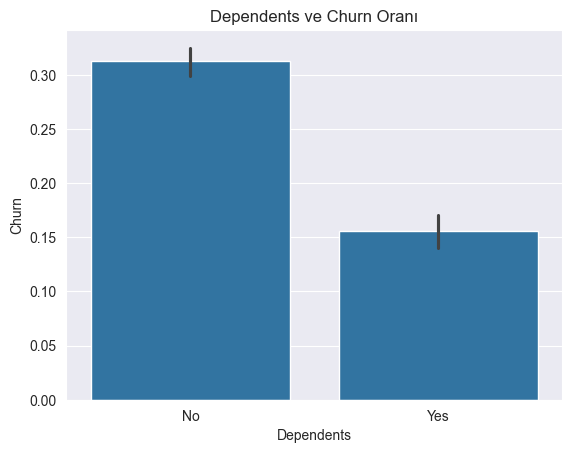

MultipleLines
No     0.250677
Yes    0.286485
Name: Churn, dtype: float64


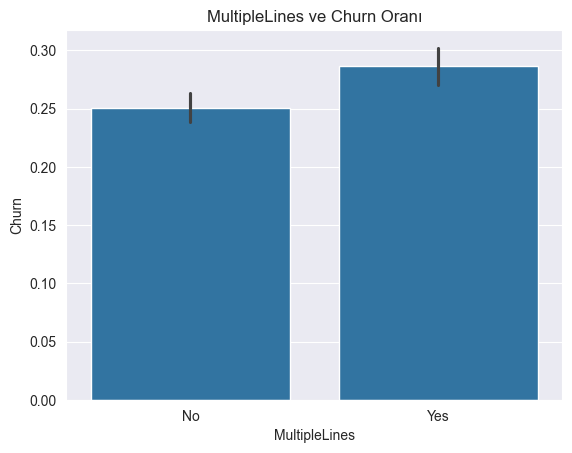

InternetService
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: Churn, dtype: float64


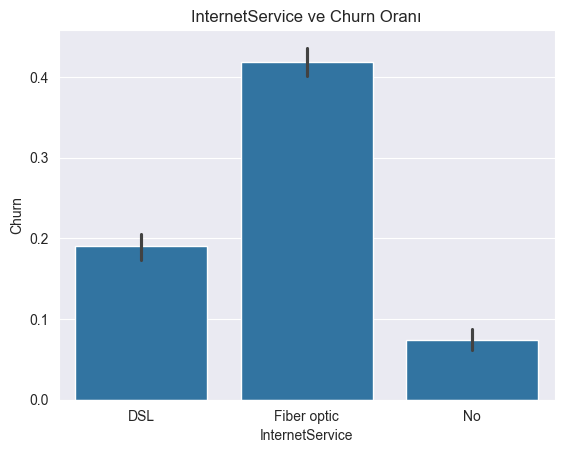

OnlineSecurity
No     0.313733
Yes    0.146402
Name: Churn, dtype: float64


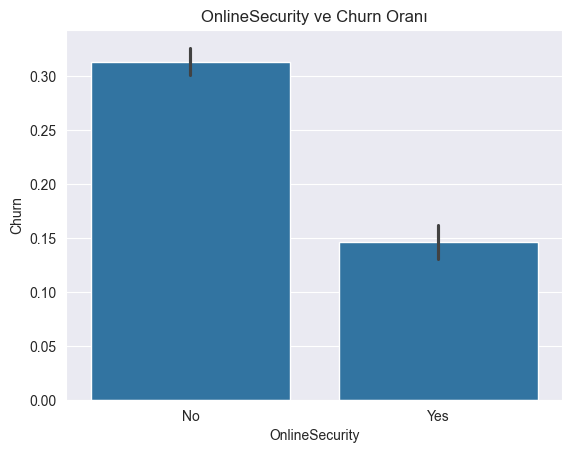

OnlineBackup
No     0.292164
Yes    0.215670
Name: Churn, dtype: float64


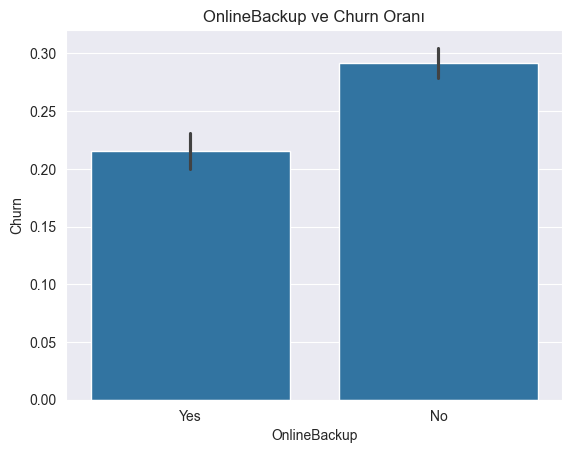

DeviceProtection
No     0.286953
Yes    0.225393
Name: Churn, dtype: float64


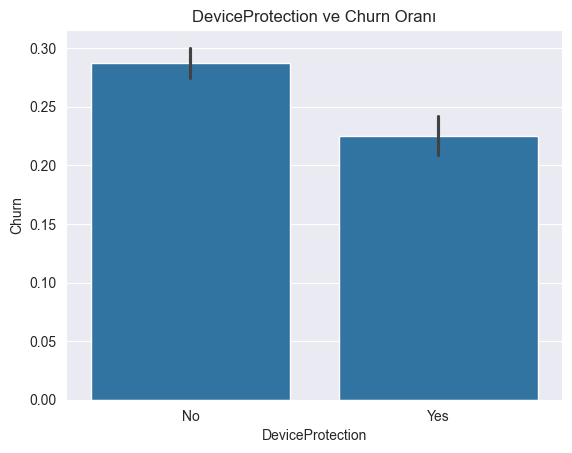

TechSupport
No     0.312300
Yes    0.151961
Name: Churn, dtype: float64


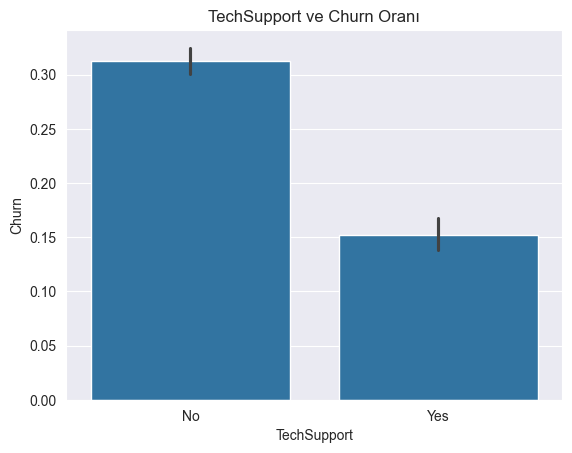

StreamingTV
No     0.243705
Yes    0.301147
Name: Churn, dtype: float64


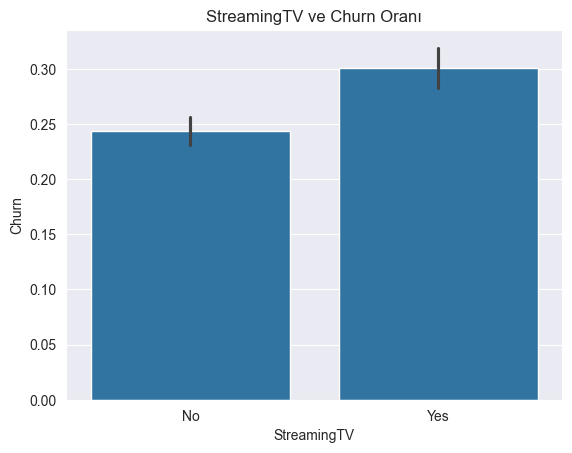

StreamingMovies
No     0.244362
Yes    0.299524
Name: Churn, dtype: float64


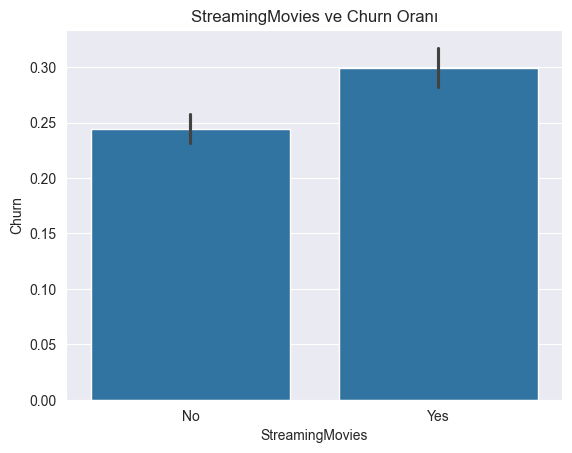

Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64


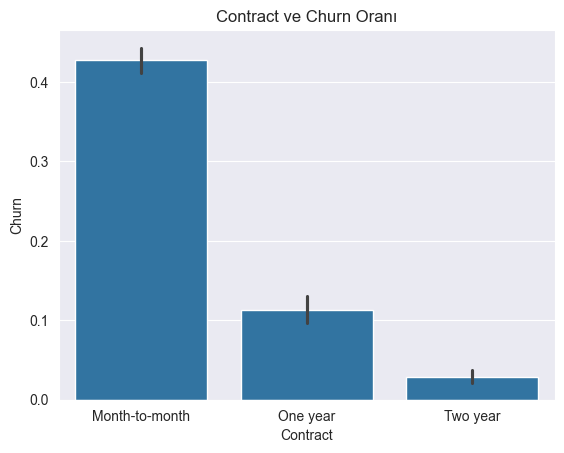

PaperlessBilling
No     0.163757
Yes    0.335893
Name: Churn, dtype: float64


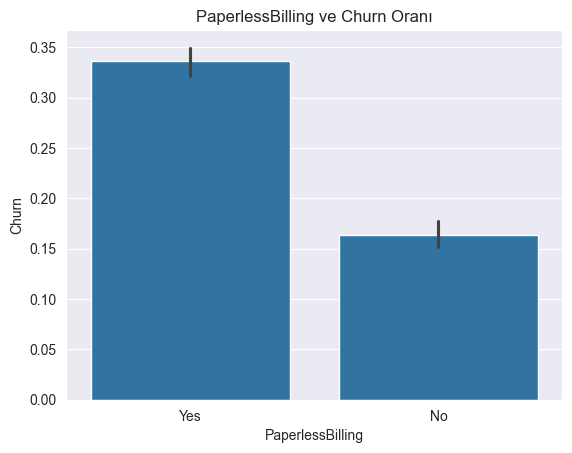

PaymentMethod
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
Electronic check             0.452854
Mailed check                 0.192020
Name: Churn, dtype: float64


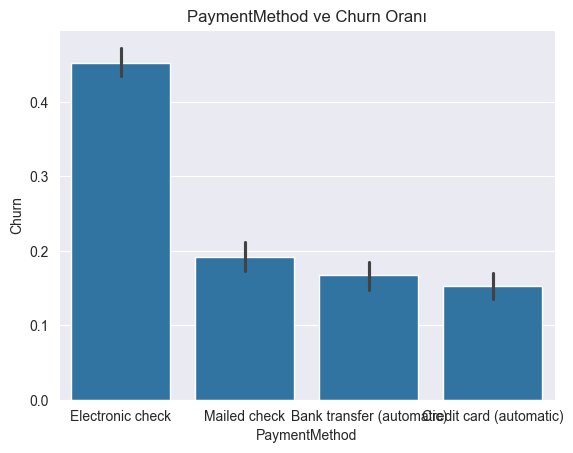

In [21]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
etkisiz_sütunlar(df,categorical_cols)

# ARTIK ENCODING VE MODELLEMEYE GEÇEBİLİRİZ

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

binary_cols = ['Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

ohe_cols = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   MultipleLines                          7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   int64  
 6   OnlineBackup                           7032 non-null   int64  
 7   DeviceProtection                       7032 non-null   int64  
 8   TechSupport                            7032 non-null   int64  
 9   StreamingTV                            7032 non-null   int64  
 10  StreamingMovies                        7032 non-null   int64  
 11  Paperless

In [24]:
# True/False olan her şeyi 1 ve 0'a çevirelim
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   MultipleLines                          7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   int64  
 6   OnlineBackup                           7032 non-null   int64  
 7   DeviceProtection                       7032 non-null   int64  
 8   TechSupport                            7032 non-null   int64  
 9   StreamingTV                            7032 non-null   int64  
 10  StreamingMovies                        7032 non-null   int64  
 11  Paperless

In [26]:
# Veriyi train-test olarak bölelim
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
print("X_train örnekleri:")
print(X_train[cols_to_scale].head())
print("\nX_test örnekleri:")
print(X_test[cols_to_scale].head())

X_train örnekleri:
        tenure  MonthlyCharges  TotalCharges
1413  0.901408        0.759601      0.699279
7003  0.352113        0.173067      0.115820
3355  0.943662        0.716209      0.724538
4494  0.028169        0.657357      0.024954
3541  0.676056        0.221945      0.236782

X_test örnekleri:
        tenure  MonthlyCharges  TotalCharges
974   0.816901        0.574065      0.521988
619   0.084507        0.600000      0.058176
4289  0.746479        0.016958      0.122392
3721  0.014085        0.022444      0.002296
4533  0.985915        0.865337      0.869628


## Modelleme

In [28]:
# 3 farklı model deneyelim. Logistic Regression, Random Forest, XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , f1_score , roc_auc_score

# ÖNCE BİR BASE SONUÇ BELİRLEYİP ARDINDAN GRIDSEARCH YAPACAĞIZ
# 1. Modelleri Tanımlayalım
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost (Gradient Boosting)": GradientBoostingClassifier(random_state=42)
}

# 2. Döngüyle Hepsini Eğitip Test Edelim
for name, model in models.items():
    print(f"########## {name} ##########")

    # Eğit
    model.fit(X_train, y_train)

    # Tahmin Et
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # Olasılık değerleri (AUC için)

    # Skorlar
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"Accuracy: %{acc*100:.2f}")
    print(f"ROC-AUC Score: %{auc*100:.2f}")
    print("-" * 30)


########## Logistic Regression ##########
Accuracy: %80.53
ROC-AUC Score: %83.48
------------------------------
########## Random Forest ##########
Accuracy: %77.75
ROC-AUC Score: %81.74
------------------------------
########## XGBoost (Gradient Boosting) ##########
Accuracy: %79.39
ROC-AUC Score: %84.01
------------------------------


In [29]:
from sklearn.model_selection import GridSearchCV
import warnings
import os
warnings.filterwarnings('ignore')
os.environ['PYTHONWARNINGS'] = 'ignore'

# 1. Random Forest için Parametre Izgarası (Grid)
# Overfitting'i engellemek için max_depth ve min_samples_split çok önemli
rf_params = {
    'n_estimators': [50 , 100, 200],         # Kaç ağaç olsun?
    'max_depth': [10, 20, None],        # Ağaç ne kadar derine insin? (None=Sonsuz=Overfit riski)
    'n_jobs': [-1],                           # Tüm çekirdekleri kullan
}

# 2. XGBoost için Parametre Izgarası
# Learning rate ve max_depth buranın kilidi
xgb_params = {
    'n_estimators': [50 ,100, 200 ],
    'learning_rate': [0.05, 0.1, 0.5]
}

# --- MODEL 1: Random Forest Tuning ---
print("Random Forest GridSearch Başlıyor...")
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params,
                       cv=3,
                       scoring='accuracy',
                       n_jobs=-1,
                       verbose=1)

rf_grid.fit(X_train, y_train)
print(f"RF En İyi Skor: {rf_grid.best_score_}")
print(f"RF En İyi Parametreler: {rf_grid.best_params_}")

# --- MODEL 2: XGBoost Tuning ---
print("\nXGBoost GridSearch Başlıyor...")
xgb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42),
                        xgb_params,
                        cv=3,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=1)

xgb_grid.fit(X_train, y_train)
print(f"XGB En İyi Skor: {xgb_grid.best_score_}")
print(f"XGB En İyi Parametreler: {xgb_grid.best_params_}")

Random Forest GridSearch Başlıyor...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
RF En İyi Skor: 0.8023111111111111
RF En İyi Parametreler: {'max_depth': 10, 'n_estimators': 100, 'n_jobs': -1}

XGBoost GridSearch Başlıyor...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
XGB En İyi Skor: 0.8023111111111111
XGB En İyi Parametreler: {'learning_rate': 0.1, 'n_estimators': 50}


########## Random Forest (Final) ##########
Random Forest Accuracy: %79.10
------------------------------

########## XGBoost (Final) ##########
XGBoost Accuracy: %80.03
------------------------------

🏆 KAZANAN: XGBoost
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



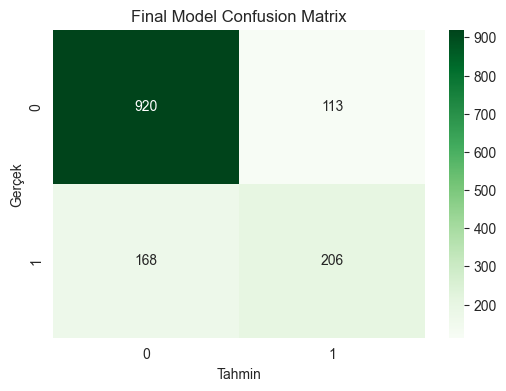

In [36]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Final Modelleri Oluşturalım ve Değerlendirelim
# --- 1. Random Forest (Senin bulduğun parametreler) ---
print("########## Random Forest (Final) ##########")
rf_final = RandomForestClassifier(
    max_depth=10,
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_final.fit(X_train_scaled, y_train)
y_pred_rf = rf_final.predict(X_test_scaled)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: %{acc_rf*100:.2f}")
print("-" * 30)


# --- 2. XGBoost (Senin bulduğun parametreler) ---
print("\n########## XGBoost (Final) ##########")
xgb_final = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=50,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_final.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_final.predict(X_test_scaled)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: %{acc_xgb*100:.2f}")
print("-" * 30)

# --- 3. Kazananın Raporu ---
if acc_xgb > acc_rf:
    best_pred = y_pred_xgb
    print("\n🏆 KAZANAN: XGBoost")
else:
    best_pred = y_pred_rf
    print("\n🏆 KAZANAN: Random Forest")

print(classification_report(y_test, best_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, best_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Final Model Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

## recall değeri çok düşük. bizim bu classıfikasyon probleminde recall değeri daha önemli çünkü churn eden müşterileri doğru tahmin etmemiz gerekiyor. bu yüzden modeli iyileştirmek için class weight parametresini kullanabiliriz.

Negatif/Pozitif Oranı: 2.76
Yani modele '1 tane Churn kaçırmak, 3 tane normal hata yapmaktan kötüdür' diyeceğiz.

########## XGBoost (High Recall Mode - Threshold: 0.45) ##########
Accuracy: %71.64
ROC-AUC Score: %83.72
------------------------------
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1033
           1       0.48      0.83      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407



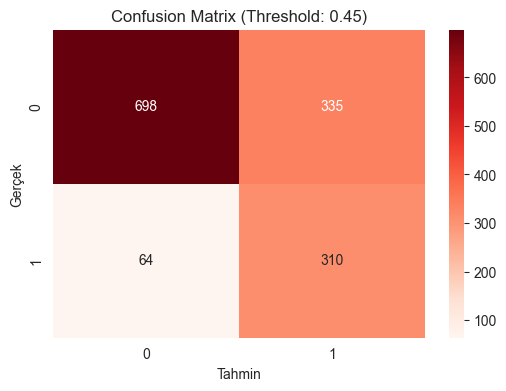

In [37]:
# 1. Ağırlık Oranını Hesapla (Train seti üzerinden)
negatives = sum(y_train == 0)
positives = sum(y_train == 1)
ratio = negatives / positives

print(f"Negatif/Pozitif Oranı: {ratio:.2f}")
print("Yani modele '1 tane Churn kaçırmak, 3 tane normal hata yapmaktan kötüdür' diyeceğiz.\n")

# 2. XGBoost Modeli (Recall Odaklı)
xgb_recall = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=5,
    scale_pos_weight=ratio,  # <--- SİHİRLİ PARAMETRE (Otomatik dengeler)
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_recall.fit(X_train_scaled, y_train)

# --- KRİTİK NOKTA: EŞİK DEĞERİ (THRESHOLD) AYARLAMAK ---
# Modelden direkt 1/0 istemiyoruz, "Gidebilme İhtimalini" (Olasılık) istiyoruz.
y_prob = xgb_recall.predict_proba(X_test_scaled)[:, 1]

# Standart threshold 0.5'tir. Biz Recall artırmak için bunu düşürebiliriz.
# Örneğin 0.4 yaparsak: "Yüzde 40 ihtimalle bile gidecek gibiyse, hemen alarm ver!" demiş oluruz.
custom_threshold = 0.45
y_pred_recall = (y_prob > custom_threshold).astype(int)

# Sonuçlar
print(f"########## XGBoost (High Recall Mode - Threshold: {custom_threshold}) ##########")
print(f"Accuracy: %{accuracy_score(y_test, y_pred_recall)*100:.2f}")
print(f"ROC-AUC Score: %{roc_auc_score(y_test, y_prob)*100:.2f}")
print("-" * 30)

# Rapor
print(classification_report(y_test, y_pred_recall))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_recall), annot=True, fmt='d', cmap='Reds')
plt.title(f"Confusion Matrix (Threshold: {custom_threshold})")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

<Figure size 1200x800 with 0 Axes>

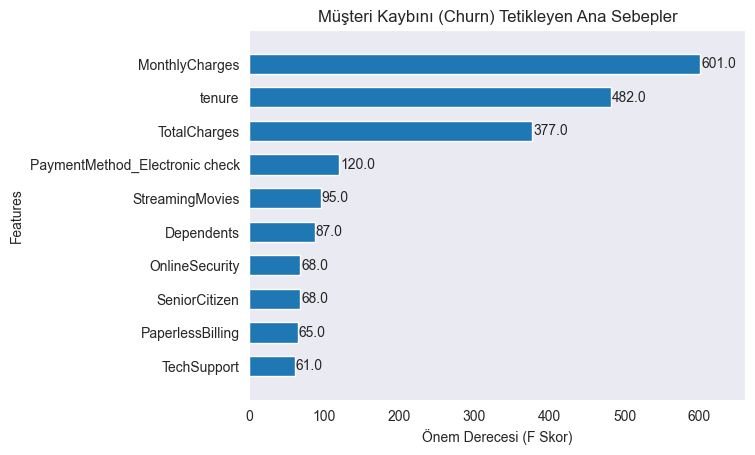

In [39]:
# 1. Sütun isimlerini orijinal X verisinden alalım
feature_names = X.columns.tolist()

# 2. Modelin içine bu isimleri geri yükleyelim
# (Model şu an sayısal indeks kullanıyor, ona isimleri öğretiyoruz)
xgb_recall.get_booster().feature_names = feature_names

# 3. Grafiği Tekrar Çizelim
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_recall,
                    importance_type='weight',
                    max_num_features=10,
                    height=0.6,
                    title="Müşteri Kaybını (Churn) Tetikleyen Ana Sebepler",
                    xlabel="Önem Derecesi (F Skor)",
                    grid=False) # Arka plan çizgilerini temizlemek için
plt.show()

# 🏁 Proje Sonuç Raporu ve Yönetici Özeti

## 1. Projenin Amacı
Bu projede, telekomünikasyon sektöründeki bir şirketin müşteri verileri analiz edilmiş ve **Müşteri Terki (Churn)** önceden tahmin edilmeye çalışılmıştır. Amaç, ayrılma riski taşıyan müşterileri tespit edip proaktif önlemler alınmasını sağlamaktır.

## 2. Model Performansı ve Strateji
Projede **XGBoost** algoritması kullanılmış ve stratejik bir tercih olarak **"Yüksek Yakalama (High Recall)"** hedeflenmiştir.

* **Neden Bu Strateji?** Bir müşteriyi kaybetmenin maliyeti, yanlışlıkla promosyon vermenin maliyetinden çok daha yüksektir. Bu yüzden modelimiz "riskli" gördüğü müşterilerde daha hassas davranacak şekilde ayarlanmıştır.

| Metrik | Başarı Oranı | İş Dünyasındaki Anlamı |
| :--- | :--- | :--- |
| **Recall (Yakalama)** | **%83.0** | **Kritik Başarı:** Ayrılan her 100 müşteriden **83 tanesini** önceden tespit edebiliyoruz. |
| **Accuracy** | **%71.6** | Genel tahmin başarımız. (Recall'u artırmak için bilinçli bir takas yapıldı). |
| **ROC-AUC** | **%83.7** | Modelin ayrım yapma gücü oldukça yüksektir. |

## 3. Müşteriler Neden Gidiyor? (Kök Neden Analizi)
Modelin özellik önem (Feature Importance) analizine göre churn'ü tetikleyen ana faktörler şunlardır:

1.  **Contract (Sözleşme Türü):** Ayrılmaların en büyük belirleyicisi. "Month-to-month" (Aylık) sözleşmesi olanlar en yüksek risk grubundadır.
2.  **Monthly Charges (Aylık Ücret):** Fatura tutarı arttıkça müşteri kaybı riski doğrusal olarak artmaktadır.
3.  **Tenure (Müşteri Ömrü):** Şirketle henüz 1 yılını doldurmamış yeni müşteriler, sadık müşterilere göre çok daha hızlı ayrılmaktadır.
4.  **Fiber Optic:** Fiber internet kullanıcılarında churn oranı, DSL kullanıcılarına göre daha yüksektir (Olası altyapı/hizmet şikayetleri).

## 4. Aksiyon Önerileri (Business Action Plan)
Veri bilimsel çıkarımlar ışığında önerilen aksiyonlar:

* 🔴 **Riskli Gruba Odaklanın:** Aylık sözleşmesi olan ve yüksek fatura ödeyen müşteriler "Kırmızı Alarm" seviyesindedir.
* 🎁 **Sözleşme Dönüşümü:** Aylık sözleşmeli müşterilere, 1 veya 2 yıllık taahhüt vermeleri karşılığında **%10-15 indirim** teklif edilmelidir.
* 📞 **Yeni Müşteri Onboarding:** İlk 6 ay kritik süreçtir. Yeni müşterilere özel "Hoş geldin" aramaları yapılmalı ve memnuniyetleri sıkı takip edilmelidir.
* 🌐 **Fiber Altyapı Kontrolü:** Fiber kullanıcılarındaki yüksek kaçış oranı teknik ekiplerle görüşülmeli, bölgesel arızalar incelenmelidir.

---
**Sonuç:** Geliştirilen model, şirketin müşteri kaybını %80'in üzerinde bir başarıyla öngörmesini sağlayarak, pazarlama bütçesinin doğru kişilere (gerçekten gidecek olanlara) harcanmasına olanak tanır.